# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [17]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

In [18]:
print(X_raw.shape)
print(y_raw.shape)

(60000, 28, 28)
(60000,)


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

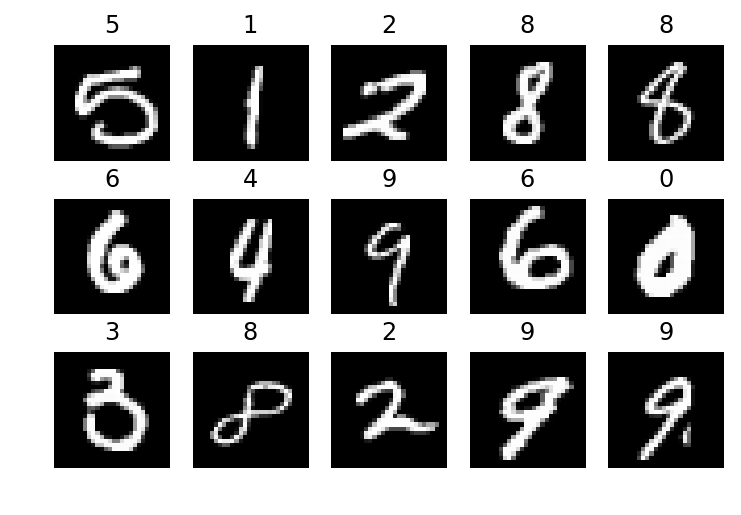

In [19]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [20]:
# map 0-255 to 0-1
X_raw = X_raw.astype('float')
X_raw = X_raw / 255.0

In [21]:
import numpy as np
import random
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

EMPTY_LABEL = 10

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.float64)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for index in range(X_len):    
        rand_n = random.randint(1,5)
        rand_indexs = [random.randint(0, X_len-1) for i in range(rand_n)]
        
        imgs = [X[i] for i in rand_indexs]
        labels = np.array([y[i] for i in rand_indexs] + [EMPTY_LABEL] * (5 - rand_n))
        
        for indx, img in enumerate(imgs):
            img = img.reshape([height, width, 1])
            width_s = indx*width
            
            X_gen[index][0:height,width_s:width_s + width] = img
            
            for lindx, label in enumerate(labels):
                y_gen[lindx][index][label] = 1
                
    return X_gen, y_gen


X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=2333)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

In [22]:
print(X_train.shape)
print(len(y_train))
print(y_train[0].shape)

(48000, 28, 140, 1)
5
(48000, 11)


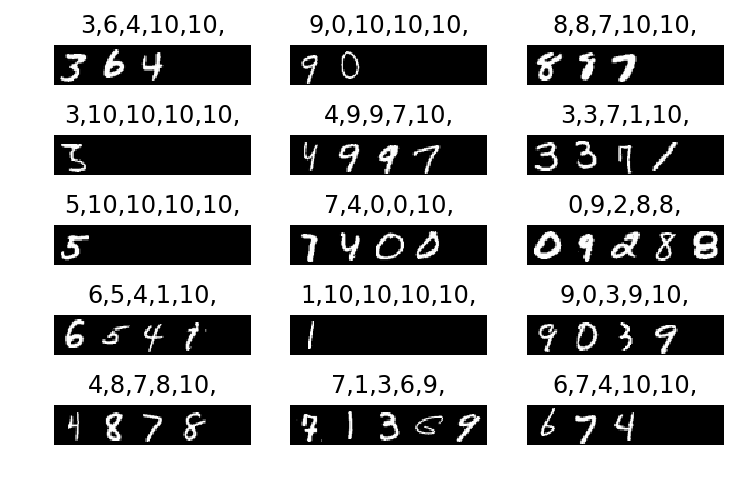

In [23]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**

1. 构造一个28\*140的空白位图，在讲选择出来的图片每28像素一张贴到空白图片上。

2. 之前写过一篇总结: [为什么要分割数据？](https://kidjourney.github.io/2017/02/24/why-split-data-to-train-and-test/)，从里面摘出了一部分：

> ### 数据分割

> 如果你在使用同一组数据来训练模型，并且用同一组数据来测试模型的话，模型会给出一个相当完美的得分。
但是当你将模型扩展到未知数据时，效果就差强人意了。

> 这种情况叫做过拟合。

> 为了避免这种情况，我们会将数据分成两部分，一部分用来训练，叫做training set， 另一部分用来测试，叫做test set。

> 看起来似乎这样就可以解决问题了？

> 并没有。

> 每个模型还有一些对应的参数（hyperparameters)，当我们在测试集上调参时，我们其实不知不觉中泄露了一些测试集的信息给模型，这样还是会造成模型无法泛化。

> 为了解决这个问题，我们还需要一部分数据，来做validation set。

> 于是，整个流程变成了。

> 分割数据 -> training set训练 -> validation set验证 -> test set验证

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [24]:
# constant define

img_width, img_height = 28 * 5, 28

from keras import backend as K
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_height, img_width)
else:
    input_shape = (img_height, img_width, 1)

In [25]:
from keras.models import Model
from keras.layers import *

def naive_model():
    """Too young too simple, something naive !"""
    model_input = Input(input_shape)

    # 28 * 140 * 1 -> 28 * 140 * 32
    conv1 = Conv2D(32, (3,3), padding='same', activation='relu', name='conv1')(model_input)
    # 28 * 140 * 32 -> 28 * 140 * 1024
    conv2 = Conv2D(32, (3,3), padding='same', activation='relu', name='conv2')(conv1)
    # pooling 28 * 140 * 1024 -> 14 * 70 * 1024
    pooling1 = MaxPool2D(pool_size=2, padding='valid', name='pooling')(conv2)
    # dropout 
    dropout = Dropout(0.5, name='dropout')(pooling1)
    # transform matrix to 1d list
    flatten = Flatten(name='flatten')(dropout)

    # two FCN
    fc1 = Dense(1024, activation='relu', name='fc1')(flatten)
    fc2 = Dense(1024, activation='relu', name='fc2')(fc1)

    # five classifier
    clfs = [Dense(n_class, activation='softmax', name='clf{}'.format(i))(fc2) for i in range(n_len)]
    # build a model
    model = Model(inputs=model_input, outputs=clfs)
    
    return model

def other_try_model():
    model_input = Input(input_shape)

    # 28 * 140 * 1 -> 28 * 140 * 32
    conv1 = Conv2D(32, (3,3), padding='same', activation='relu', name='conv1')(model_input)
    # pooling 28 * 140 * 32 -> 14 * 70 * 32
    pooling1 = MaxPooling2D(pool_size=2,name='pooling1')(conv1)
    # 28 * 140 * 32 -> 28 * 140 * 1024
    conv2 = Conv2D(32, (3,3), padding='same', activation='relu', name='conv2')(pooling1)
    # pooling 28 * 140 * 1024 -> 14 * 70 * 1024
    pooling1 = MaxPool2D(pool_size=2, padding='valid', name='pooling')(conv2)
    # dropout 
    dropout = Dropout(0.5, name='dropout')(pooling1)
    # transform matrix to 1d list
    flatten = Flatten(name='flatten')(dropout)

    # two FCN
    fc1 = Dense(1024, activation='relu', name='fc1')(flatten)
    fc2 = Dense(1024, activation='relu', name='fc2')(fc1)

    # five classifier
    clfs = [Dense(n_class, activation='softmax', name='clf{}'.format(i))(fc2) for i in range(n_len)]
    # build a model
    model = Model(inputs=model_input, outputs=clfs)
    
    return model

model = other_try_model()

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 

我使用了如下几项技术:

1. 卷积神经网络：卷积神经网络是一种特征抽取网络，对图像处理有较好的效果。他在空间上共享参数，提取局部信息。

2. 池化：池化是一种采样方式，一般是从feature map中提取最重要的特征，减少网络参数，实现降维并且防止过拟合。

3. dropout: dropout是一种通过随机丢弃激励的正规化方法，可以有效的防止过拟合。

### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

In [27]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
plot_model(model, to_file="model_new.png")

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**

![model](./model_new.png)

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# TODO: 训练你的模型
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=200, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 19s - loss: 6.2684 - clf0_loss: 1.7302 - clf1_loss: 1.5706 - clf2_loss: 1.3128 - clf3_loss: 1.0023 - clf4_loss: 0.6526 - clf0_acc: 0.3964 - clf1_acc: 0.4629 - clf2_acc: 0.5659 - clf3_acc: 0.6836 - clf4_acc: 0.8175 - val_loss: 2.9431 - val_clf0_loss: 0.8720 - val_clf1_loss: 0.6751 - val_clf2_loss: 0.5697 - val_clf3_loss: 0.4829 - val_clf4_loss: 0.3434 - val_clf0_acc: 0.6864 - val_clf1_acc: 0.7862 - val_clf2_acc: 0.8335 - val_clf3_acc: 0.8594 - val_clf4_acc: 0.8742
Epoch 2/20
48000/48000 [==============================] - 18s - loss: 2.8626 - clf0_loss: 0.7968 - clf1_loss: 0.6982 - clf2_loss: 0.5922 - clf3_loss: 0.4648 - clf4_loss: 0.3106 - clf0_acc: 0.7356 - clf1_acc: 0.7649 - clf2_acc: 0.7997 - clf3_acc: 0.8440 - clf4_acc: 0.8957 - val_loss: 1.6354 - val_clf0_loss: 0.4708 - val_clf1_loss: 0.3909 - val_clf2_loss: 0.3227 - val_clf3_loss: 0.2563 - val_clf4_loss: 0.1947 - val_clf0_ac

### Show Trainning History

dict_keys(['clf4_acc', 'val_clf0_acc', 'clf2_loss', 'val_clf3_acc', 'val_clf3_loss', 'val_loss', 'clf3_loss', 'clf0_acc', 'val_clf2_loss', 'clf4_loss', 'val_clf2_acc', 'val_clf0_loss', 'val_clf1_loss', 'val_clf4_loss', 'clf1_acc', 'clf3_acc', 'loss', 'clf2_acc', 'clf0_loss', 'clf1_loss', 'val_clf4_acc', 'val_clf1_acc'])


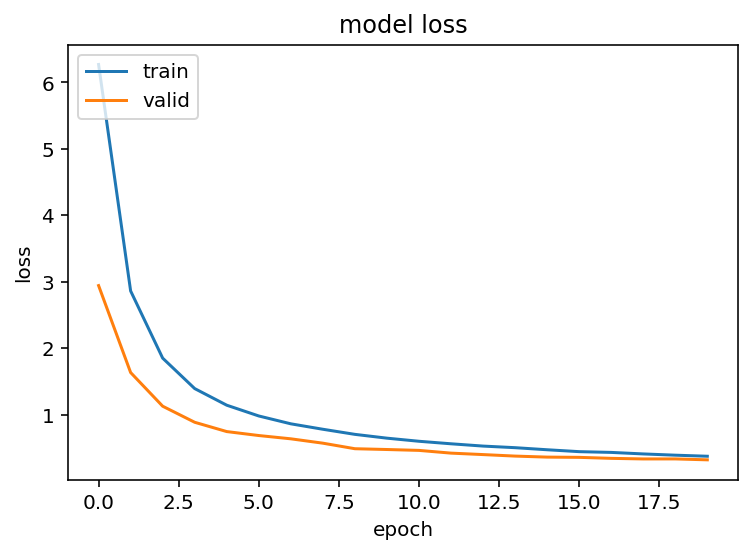

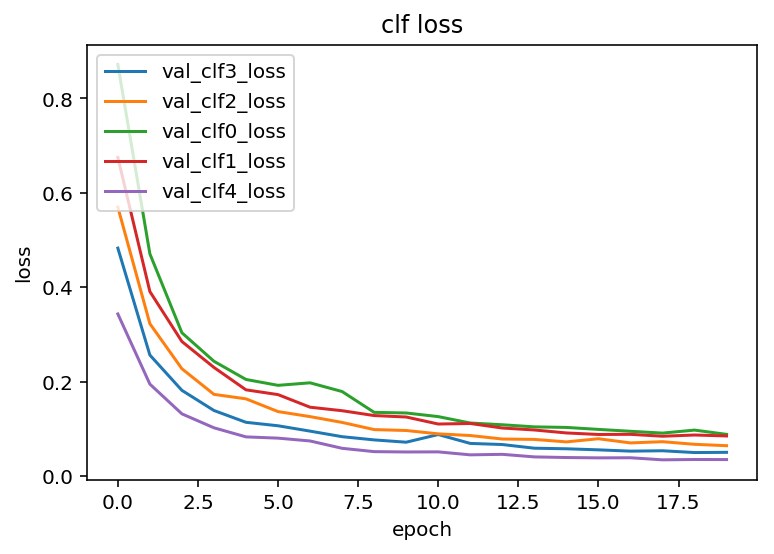

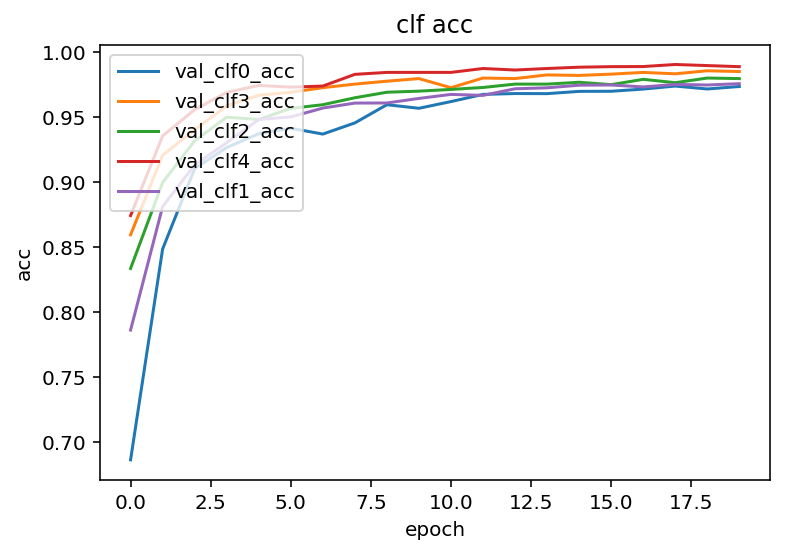

In [12]:
print(history.history.keys())
clf_names = [i for i in history.history.keys() if 'clf' in i and 'val' in i]
# loss related info
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'] , loc='upper left')
plt.show()

clf_loss_names = [i for i in clf_names if 'loss' in i]
clf_acc_names = [i for i in clf_names if 'acc' in i]

for loss in clf_loss_names:
    plt.plot(history.history[loss])
plt.title('clf loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(clf_loss_names , loc='upper left')
plt.show()

for acc in clf_acc_names:
    plt.plot(history.history[acc])
plt.title('clf acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(clf_acc_names , loc='upper left')
plt.show()


### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [13]:
res = model.predict(X_test)

In [14]:
def transform_res(res):
    ret = [np.zeros_like(res[0]) for i in range(len(res))]
    for indx, clfres in enumerate(res):
        ret[indx][np.arange(len(clfres)), clfres.argmax(1)] = 1
    return ret

In [15]:
from functools import reduce
def evaluate(model):
    predict = model.predict(X_test)
    predict = transform_res(predict)
    
    res = []
    for indx, _ in enumerate(y_test):
         res.append(predict[indx].argmax(1) == y_test[indx].argmax(1))
    
    res = reduce(lambda x,y : x & y, res)

    # TODO: 按照错一个就算错的规则计算准确率
    return sum(res) / len(res)

evaluate(model)

0.89410000000000001

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

准确度在90%左右，我认为模型可以解决大部分问题，但还有优化空间。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

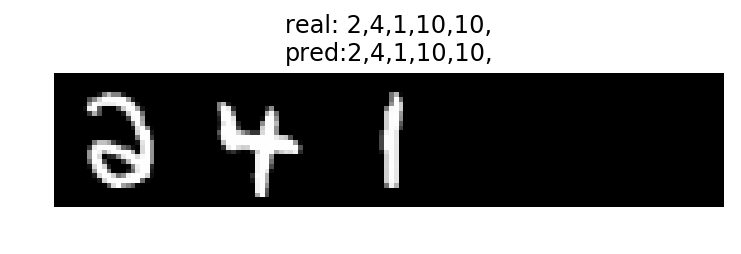

In [18]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [20]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())